In [15]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 435.7 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/151.4 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Guest1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Guest1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
url = 'https://spamassassin.apache.org/old/publiccorpus/readme.html'
messages = pd.read_csv(url, sep ='\t',names=["Paragraph"])
messages[:]

,Paragraph
0,<pre>
1,REVISION HISTORY OF THIS CORPUS:
2,(**update**: Oct 21 2002 jm: added nearly 3000...
3,(**update**: Nov 24 2002 jm: removed Replied: ...
4,(**update**: Dec 4 2002 jm: removed a German ...
...,...
67,"[from the ham corpus] with the URL ""www.counte..."
68,like the domain changed may have changed hands...
69,live lookups will probably now produce differe...
70,have been seen at time of first email receipt;...


In [20]:
messages.head(30)

,Paragraph
0,<pre>
1,REVISION HISTORY OF THIS CORPUS:
2,(**update**: Oct 21 2002 jm: added nearly 3000...
3,(**update**: Nov 24 2002 jm: removed Replied: ...
4,(**update**: Dec 4 2002 jm: removed a German ...
5,"SpamAssassin markup, and quite a few duplicate..."
6,"obfuscation using ""example.com"" with ""spamassa..."
7,example.com has no MX record.)
8,(**update**: Feb 28 2003 jm: Bob Dickinson rep...
9,that should have been removed from the headers...


In [21]:
messages.tail(40)

,Paragraph
32,- All headers are reproduced in full. Some ...
33,"place, and hostnames in some cases have be..."
34,"""spamassassin.taint.org"" (which has a vali..."
35,"though, the headers appear as they were re..."
36,- All of these messages were posted to publi...
37,"knowledge that they may be made public, we..."
38,newsletters from public news web sites.
39,- relying on data from public networked blac...
40,or Pyzor for identification of these messa...
41,previous downloader of this corpus might h...


In [22]:
# Describing the DataSets:
messages.describe()

,Paragraph
count,72
unique,71
top,----------------------------------------------...
freq,2


In [23]:
# Combine the Entire 72 Rows into the Single Sentence with the Different Texts:
combined_text = ' '.join(messages["Paragraph"].tolist())

In [24]:
combined_text

'<pre> REVISION HISTORY OF THIS CORPUS: (**update**: Oct 21 2002 jm: added nearly 3000 more messages.) (**update**: Nov 24 2002 jm: removed Replied: and Forwarded: headers.) (**update**: Dec  4 2002 jm: removed a German message, some left-over SpamAssassin markup, and quite a few duplicate messages.  Also replaced header obfuscation using "example.com" with "spamassassin.taint.org", since example.com has no MX record.) (**update**: Feb 28 2003 jm: Bob Dickinson reported some leftover markup that should have been removed from the headers.  Now cleaned.) (**update**: Apr 23 2003 jm: removed 3 messages with malicious Javascript) (**update**: Oct 10 2003 jm: noted that we\'d love to hear about papers ;) (**update**: Dec 16 2004 jm: changed a couple of hostnames in headers, in 20021010*/hard_ham/0198* and 20030228*/hard_ham/00230*.) (**update**: Mar  2 2005 jm: added note about live testing) (**update**: Mar 11 2005 jm: removed a listed-as-spam mail that was really a misclassified non-spam,

In [25]:
from nltk.tokenize import word_tokenize
word_tokenize(combined_text)
words = combined_text.split()

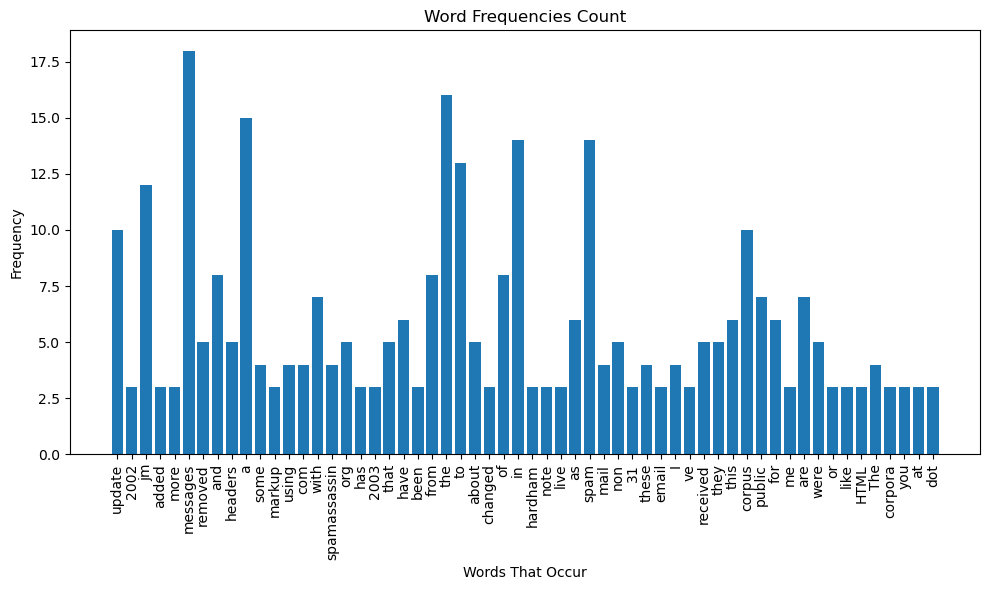

In [26]:
import re
from collections import Counter

# Example long text (replace this with your 1000-word-long text)
long_text = combined_text

# Tokenize the long text into words using regular expressions
words = re.findall(r'\b\w+\b', combined_text)

# Remove punctuation, commas, and periods
punctuation = str.maketrans('', '', string.punctuation + ',.')
cleaned_words = [word.translate(punctuation) for word in words if word.translate(punctuation)]

# Count Number of Occurrences of the words:
word_counts = Counter(cleaned_words)

# Set a frequency threshold
frequency_threshold = 3

# Filter words based on frequency threshold
relevant_words = {word: count for word, count in word_counts.items() if count >= frequency_threshold}

# Create a bar chart for word frequencies
plt.figure(figsize=(10, 6))
plt.bar(relevant_words.keys(), relevant_words.values())
plt.xlabel('Words That Occur')
plt.ylabel('Frequency')
plt.title('Word Frequencies Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
generate_word_cloud = WordCloud(width=500, height=300, stopwords=STOPWORDS, max_font_size=80, background_color="black", colormap='Blues').generate(combined_text)

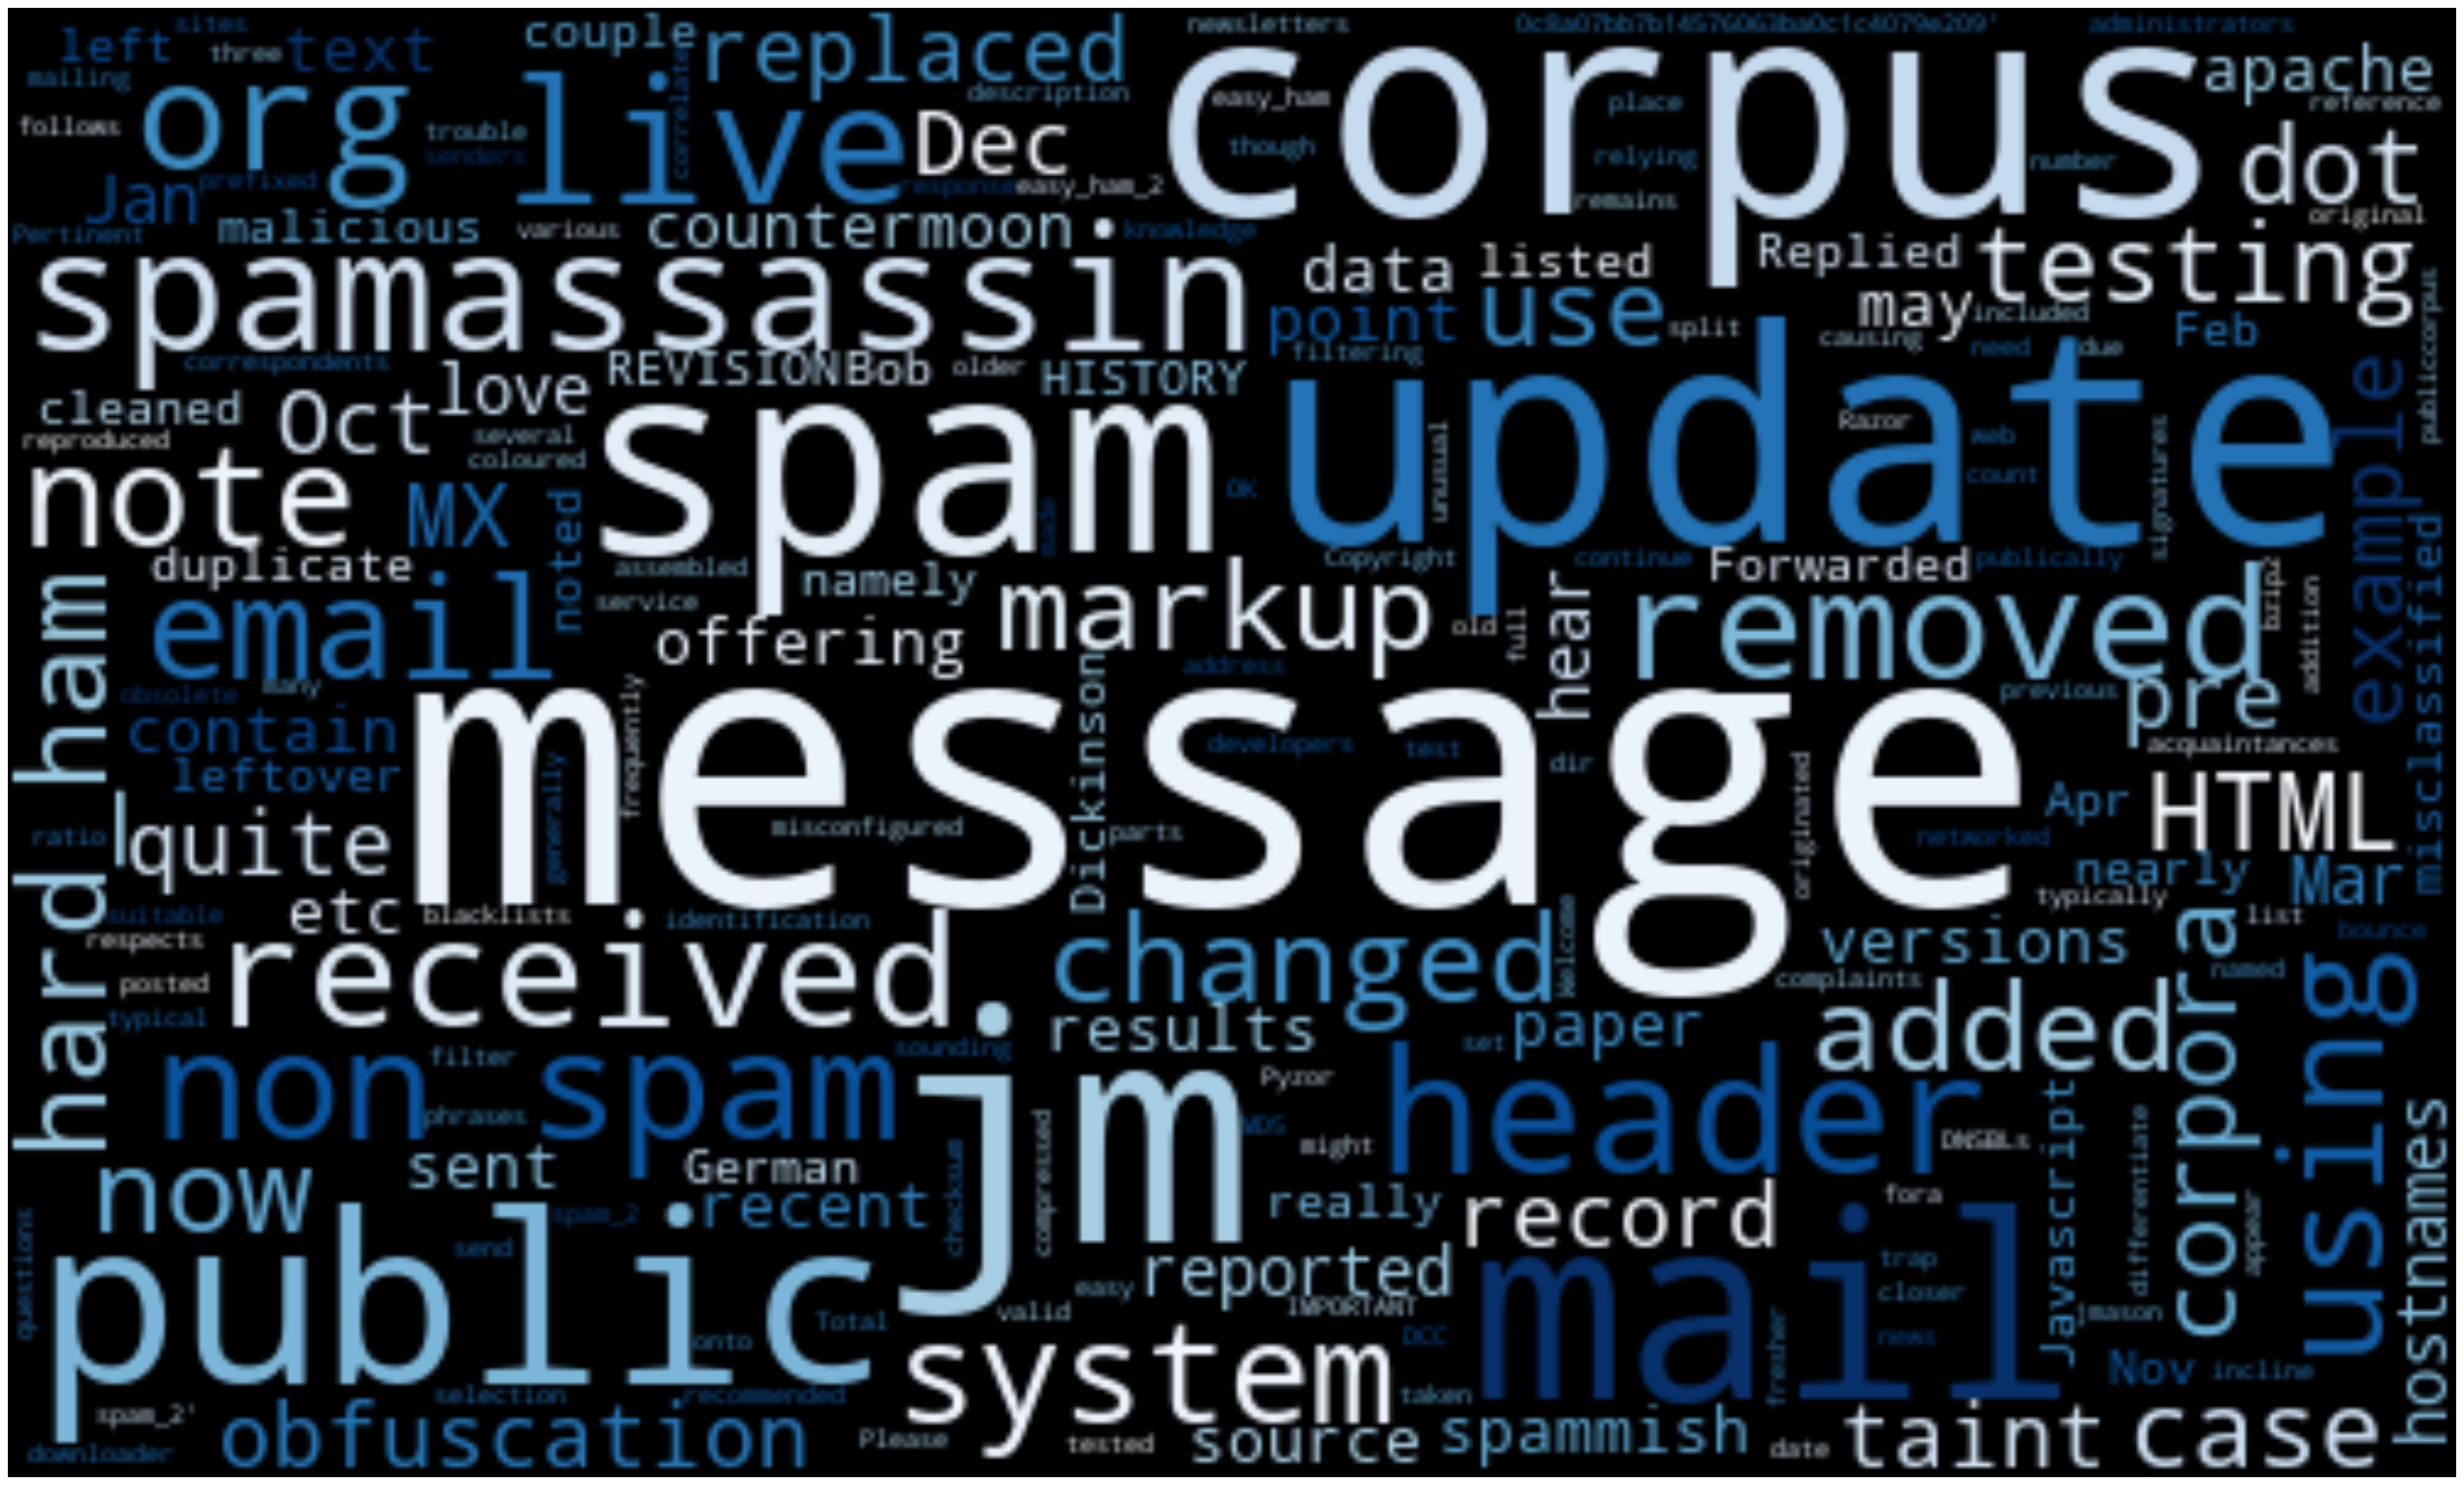

In [28]:
plt.figure(figsize=(40, 40))
plt.imshow(generate_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# How to interpret the Word Cloud:
# The Bigger the words, it mean to say that the More Occurrences of that particular words
# and hence this would possibly result in a Spam Words.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

words = list(relevant_words.keys())
frequency = list(relevant_words.values())

In [31]:
x = np.array(words).reshape(-1,1)
flattened_array = [item for sublist in x for item in sublist]
y = np.array(frequency)

In [32]:
len(flattened_array)

58

In [33]:
vectorizer = TfidfVectorizer()

In [34]:
X_tfidf = vectorizer.fit_transform(flattened_array)

In [35]:
X_train, X_test, Y_train, Y_test=train_test_split(X_tfidf,y, test_size=0.5, random_state=50)

In [36]:
# Creating the LogisticRegression Model:
model = LogisticRegression()

In [37]:
# The fit method train the Linear Regression Model using the Training Data 
# that you have split initially, After this step, the model have learnt the relationship
# between the X and Y Variables relationship:
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
predictions = model.predict(X_test)

In [39]:
accuracy_of_prediction = accuracy_score(Y_test, predictions)

In [40]:
report = classification_report(Y_test, predictions, zero_division=1)

In [41]:
report

'              precision    recall  f1-score   support\n\n           3       0.34      1.00      0.51        10\n           4       1.00      0.00      0.00         6\n           5       1.00      0.00      0.00         7\n           6       1.00      0.00      0.00         1\n          10       1.00      0.00      0.00         2\n          13       1.00      0.00      0.00         1\n          15       1.00      0.00      0.00         1\n          16       1.00      0.00      0.00         1\n\n    accuracy                           0.34        29\n   macro avg       0.92      0.12      0.06        29\nweighted avg       0.77      0.34      0.18        29\n'

In [42]:
accuracy_of_prediction

0.3448275862068966

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [44]:
Sparsed_X = X_tfidf.toarray()

In [45]:
X_train, X_test, Y_train, Y_test=train_test_split(Sparsed_X, y,test_size=0.5, random_state=50)

In [46]:
Gaussian_Classifier = GaussianNB()

In [47]:
Gaussian_Classifier.fit(X_train, Y_train)

GaussianNB()

In [48]:
predictions = Gaussian_Classifier.predict(X_test)

In [49]:
accuracy_result = accuracy_score(Y_test, predictions)

In [50]:
accuracy_result

0.20689655172413793

In [51]:
report = classification_report(Y_test, predictions, zero_division=1)

In [52]:
report

'              precision    recall  f1-score   support\n\n           3       1.00      0.00      0.00        10\n           4       0.21      1.00      0.34         6\n           5       1.00      0.00      0.00         7\n           6       1.00      0.00      0.00         1\n          10       1.00      0.00      0.00         2\n          13       1.00      0.00      0.00         1\n          15       1.00      0.00      0.00         1\n          16       1.00      0.00      0.00         1\n\n    accuracy                           0.21        29\n   macro avg       0.90      0.12      0.04        29\nweighted avg       0.84      0.21      0.07        29\n'